In [26]:
import cv2

import sys
sys.path.append("../../")    # Add the path to the root directory (where we can find the folder project/)

%load_ext autoreload
%autoreload 2

from project.ComputerVision.ocr import OCR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Input absolute path toward image as input.

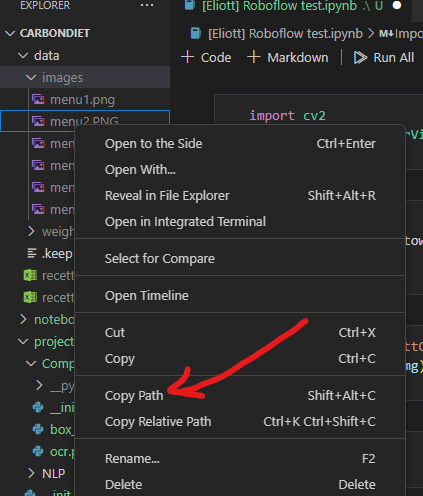

#### Import image

In [27]:
img = r'C:\Users\genef\Documents\Projets\carbondiet\from_github\data\images\pasta.jpg'   #copy absolute path toward image
#img = r'C:\Users\genef\Documents\Projets\carbondiet\from_github\data\images\feaa6c7b-9b16-4d51-b71d-75518f16cb08.jpg' #copy absolute path toward image
image = cv2.imread(img)

#### Set-up model

In [28]:
ocr = OCR()

In [29]:
dict_results = ocr.extract_text_from_menu(image)


0: 544x800 34 Recipes, 1 Section title, 427.0ms
Speed: 5.0ms preprocess, 427.0ms inference, 19.0ms postprocess per image at shape (1, 3, 800, 800)


#### Diplay results

In [30]:
print(dict_results)

{'Pasta': ['Penne Vodka E Prosciutto 13,50€ Vodka,jambon cru', 'Penne Al Pomodoro E Basilico 12,50€ Tomate,basilic', 'Penne Arrabbiata 13,50€ Tomate, piment', 'Penne Al Formaggio 14,00€ Gorgonzola, parmigiano', "Penne Al Pesto Di Olive E Gorgonzola 14,00€ Creme d'olives noiresgorgonzola", 'Spaghetti Alla Siciliana 13,50€ Tomate,anchois,capres,olives', 'Spaghetti Alla Bolognese 13,50€ Tomate,viande de bceuf', 'Linguine Al Salmone 14,00€ Créme fraiche, saumon fumé', 'Spaghetti Alla Carbonara 13,50€ Creme fraiche,poitrine', "Fusilli Tricolore Al'Ortolane Tomates cerises,courgettes,aubergines 14,5 champignons", "TagliatelleAll'Umbriana Créme fraichecepes,jambon cru,flambée au 15,00€ Brandy", 'Penne Alla Matriciana 13,50€ Tomate, poitrine,oignons', 'Tortellini Alla Carne Con 3 Colori Pates tricolores farciesa la viande,sauce pesto et 15,50€ champignons', 'lagliatelle Alla Bolognese 14.50€ Tomate,viande de bceuf', 'Tagliatelle Alla Carbonara 14,50€ Creme fraiche,poitrine', 'Linguine Agli Sca

#### [Optional] Display image and boxes

In [31]:
cv2.imshow("image", ocr.display_boxes(image))
cv2.waitKey(0)

-1

## NLP

**Import packages**

In [32]:
import project.NLP.nlp as nlp
from project.Recipes.menu import Menu
import pandas as pd

**Instantiate the NLP model**  
- The model is loaded. This is an Hugging Face model and hence it takes a few minutes to be downloaded the first time the cell is run. For next calls, it will be much faster.  
- The database is loaded from the file `data/recipes/jow_embedding.npy` if this file already exists.  
If not, this loads the corpus using the class `project.Recipes.recipes.Jow`, calculate the embeddings vectors, and save everything -> this takes a few minutes (5 to 10)

In [33]:
nlp_transformer = nlp.RecipeTransformer(db_name = "jow")

### LOADING THE MODEL ###


[2023-06-12 13:51:30,029] [ WARNING] SentenceTransformer.py:805 - No sentence-transformers model found with name C:\Users\genef/.cache\torch\sentence_transformers\dangvantuan_sentence-camembert-large. Creating a new one with MEAN pooling.


The model is loaded.
### LOADING THE DATABASE ###
The database is loaded.


**Instantiate the menu and add OCR outputs**

In [34]:
menu = Menu(img)
menu.add_ocr_output(dict_results)

**[Optional] Show the text of the menu extracted by OCR, after basic cleaning and pre-processing**

In [35]:
menu.clean_ocr_output()

# Show
pd.set_option('display.max_colwidth', None)
menu_df = menu.clean_ocr_output_df
menu_df

,Title,Ingredients,Title and Ingredients
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru"
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic"
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment"
3,Pasta,"Penne Al Formaggio Gorgonzola, parmigiano","Pasta, Penne Al Formaggio Gorgonzola, parmigiano"
4,Pasta,Penne Al Pesto Di Olive E Gorgonzola Creme d'olives noiresgorgonzola,"Pasta, Penne Al Pesto Di Olive E Gorgonzola Creme d'olives noiresgorgonzola"
5,Pasta,"Spaghetti Alla Siciliana Tomate,anchois,capres,olives","Pasta, Spaghetti Alla Siciliana Tomate,anchois,capres,olives"
6,Pasta,"Spaghetti Alla Bolognese Tomate,viande de bceuf","Pasta, Spaghetti Alla Bolognese Tomate,viande de bceuf"
7,Pasta,"Linguine Al Salmone Créme fraiche, saumon fumé","Pasta, Linguine Al Salmone Créme fraiche, saumon fumé"
8,Pasta,"Spaghetti Alla Carbonara Creme fraiche,poitrine","Pasta, Spaghetti Alla Carbonara Creme fraiche,poitrine"
9,Pasta,"Fusilli Tricolore Al'Ortolane Tomates cerises,courgettes,aubergines 14,5 champignons","Pasta, Fusilli Tricolore Al'Ortolane Tomates cerises,courgettes,aubergines 14,5 champignons"


**Add the NLP predictions**

In [36]:
# Define the list of menu queries using one of the columns of menu.clean_ocr_output_df
# For now, the column "Title And Ingredients" is the best choice 
query_names = menu.queries("Title and Ingredients")
# Find the top_k closest recipes in JOW
nlp_results = nlp_transformer.predict(query_names, top_k = 3)

Show NLP predictions without averaging (ie each recipe in the menu is matched with `top_k` recipes in the JOW database).  
Note that the `PEF_score` (last column) cannot be calculated for all recipes, either 1) because one ingredient cannot be expressed in kg or 2) because one ingredient cannot be matched with Agribalyse. In practice, the situation 2) seems to occur more often. 

In [37]:
menu_df = menu.add_nlp_predictions(nlp_results)

# Show
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
menu_df

,Title,Ingredients,Title and Ingredients,recipe_title,recipe_tag,similarity_score,similarity_rank,PEF_score
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru",Pasta alla vodka,"Pasta alla vodka, Pâtes, Parmesan, Vodka, Crème liquide, Tomate, Ail",0.743174,1,0.068944
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru",Creamy Eggs & Prosciutto pasta,"Creamy Eggs & Prosciutto pasta, Pâtes, Jambon cru, Crème liquide, Ricotta, oeuf, Basilic",0.684593,2,NaN
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru",Spaghetti endives & prosciutto,"Spaghetti endives & prosciutto, Pâtes, Endives, Jambon cru, Parmesan, Sucre",0.682368,3,0.084434
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic",Pasta alla Norma,"Pasta alla Norma, Pâtes, Tomate, Ail, Aubergine, Ricotta, Basilic",0.825199,1,NaN
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic",Pasta verde & tomates cerises,"Pasta verde & tomates cerises, Pâtes, Tomate, Pignons de pin, Huile d'olive, Basilic, Mozzarella di bufala, Ail",0.79115,2,0.133292
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic",Pasta & ragu,"Pasta & ragu, Pâtes, Chair à saucisse, Tomate pelée, Basilic, Ail, Parmesan",0.766039,3,0.166373
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment",Pasta alla Norma,"Pasta alla Norma, Pâtes, Tomate, Ail, Aubergine, Ricotta, Basilic",0.792624,1,NaN
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment",Spaghetti alla puttanesca,"Spaghetti alla puttanesca, Pâtes, Tomate, Olive noire, Câpres",0.770358,2,NaN
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment",Pasta & ragu,"Pasta & ragu, Pâtes, Chair à saucisse, Tomate pelée, Basilic, Ail, Parmesan",0.756645,3,0.166373
3,Pasta,"Penne Al Formaggio Gorgonzola, parmigiano","Pasta, Penne Al Formaggio Gorgonzola, parmigiano",One pot parmigiano pasta,"One pot parmigiano pasta, Pâtes, Lait, Parmesan, Beurre",0.67801,1,0.080326


Show NLP predictions after averaging (i.e. the `top_k` recipes found in the JOW database are averaged). The argument `threshold` (between 0 and 1) can be used to remove all ingredients in the average recipe whose contributions to the PEF score is smaller than `threshold` : for instance, if `threshold=0.05`, all ingredients that contribute less than 5% to the recipe PEF score are removed from the recipe.  
**Warning! The argument `threshold` is effectively used only if the PEF score of each ingredient can be computed. If not, it is discarded.**

In [38]:
menu_df = menu.add_nlp_predictions(nlp_results, average = True, threshold = 0.05)

# Show
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
menu_df

,Title,Ingredients,Title and Ingredients,ingredients_with_quantities,PEF_score
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru","[(Pâtes, 0.10131183021301653, kg), (Parmesan, 0.007295451370152623, kg), (Vodka, 0.005, kg), (Crème liquide, 0.0320195726388241, kg), (Tomate, 0.01, kg), (Ail, 0.0069444444444444415, kg), (Jambon cru, 0.02070396948539956, kg), (Ricotta, 0.0023029358958236153, kg), (oeuf, 0.018423487166588922, kg), (Basilic, 0.0012282324777725948, kg), (Endives, 0.03060601826870164, kg), (Sucre, 0.001530300913435082, kg)]",NaN
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic","[(Pâtes, 0.09623490078639907, kg), (Tomate, 0.0652912700602548, kg), (Ail, 0.033651285593052874, kg), (Aubergine, 0.047619047619047616, kg), (Ricotta, 0.01, kg), (Basilic, 0.008962665907763397, kg), (Pignons de pin, 0.00479369050903822, kg), (Huile d'olive, 0.00958738101807644, kg), (Mozzarella di bufala, 0.01917476203615288, kg), (Chair à saucisse, 0.03094363072614427, kg), (Tomate pelée, 0.02475490458091541, kg), (Parmesan, 0.006188726145228853, kg)]",NaN
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment","[(Pâtes, 0.09755058021169066, kg), (Tomate, 0.06573030170406322, kg), (Ail, 0.020518113577977934, kg), (Aubergine, 0.047619047619047616, kg), (Ricotta, 0.01, kg), (Basilic, 0.0026061444736384313, kg), (Olive noire, 0.006479393674145975, kg), (Câpres, 0.0024297726278047407, kg), (Chair à saucisse, 0.031820278507627454, kg), (Tomate pelée, 0.025456222806101964, kg), (Parmesan, 0.006364055701525491, kg)]",NaN
3,Pasta,"Penne Al Formaggio Gorgonzola, parmigiano","Pasta, Penne Al Formaggio Gorgonzola, parmigiano","[(Pâtes, 0.06580925123459547, kg), (Lait, 0.08333333333333333, kg), (Parmesan, 0.01, kg), (Beurre, 0.0033333333333333335, kg), (Tomate, 0.06415640362114403, kg), (Olive noire, 0.006495183580252427, kg), (Câpres, 0.00243569384259466, kg), (Gnocchi, 0.047520728579822834, kg), (Gorgonzola, 0.009504145715964566, kg), (Sauce pesto, 0.0015840242859940946, kg)]",NaN
4,Pasta,Penne Al Pesto Di Olive E Gorgonzola Creme d'olives noiresgorgonzola,"Pasta, Penne Al Pesto Di Olive E Gorgonzola Creme d'olives noiresgorgonzola","[(Pistaches, 0.005, kg), (Pâtes, 0.06481729381422668, kg), (Olive noire, 0.030036581917233473, kg), (Ail, 0.0069444444444444415, kg), (Tomate, 0.05022375030194816, kg), (Câpres, 0.007046244491330702, kg), (Pâte à pizza, 0.0702742118289555, kg), (Anchois, 0.0187397898210548, kg), (Mozzarella, 0.05856184319079625, kg)]",NaN
5,Pasta,"Spaghetti Alla Siciliana Tomate,anchois,capres,olives","Pasta, Spaghetti Alla Siciliana Tomate,anchois,capres,olives","[(Pâtes, 0.09506612404270881, kg), (Tomate, 0.06401593788117586, kg), (Olive noire, 0.006666666666666667, kg), (Câpres, 0.007157527924229943, kg), (Tomate cerise, 0.031050186161532958, kg), (Thon, 0.02794516754537966, kg), (Ail, 0.012784418561601047, kg), (Aubergine, 0.043832292211203605, kg), (Ricotta, 0.009204781364352757, kg), (Basilic, 0.0012273041819137011, kg)]",NaN
6,Pasta,"Spaghetti Alla Bolognese Tomate,viande de bceuf","Pasta, Spaghetti Alla Bolognese Tomate,viande de bceuf","[(Boeuf, 0.06528933113180521, kg), (Chair à saucisse, 0.03318921021319764, kg), (Tomate, 0.03195599779847187, kg)]",0.302444
7,Pasta,"Linguine Al Salmone Créme fraiche, saumon fumé","Pasta, Linguine Al Salmone Créme fraiche, saumon fumé","[(Saumon, 0.12987080673911797, kg), (Pâtes, 0.06602070036225635, kg)]",0.169372
8,Pasta,"Spaghetti Alla Carbonara Creme fraiche,poitrine","Pasta, Spaghetti Alla Carbonara Creme fraiche,poitrine","[(Pâtes, 0.09200687075328517, kg), (Pancetta, 0.025000000000000005, kg), (oeuf, 0.03721155188755891, kg), (Parmesan, 0.02232961861553943, kg), (Lait, 0.07496904401838414, kg), (Beurre, 0.0029987617607353657, kg), (Jambon cru, 0.012908663915669182, kg), (Crème liquide, 0.014342959906299094, kg), (Ricotta, 0.002151443985944864, kg), (Basili

## Summary : all steps in a few lines

In [39]:
import cv2
from project.ComputerVision.ocr import OCR
import project.NLP.nlp as nlp
from project.Recipes.menu import Menu
import pandas as pd
import os

Define the models and the main function -> to be integrated in the carbondiet library

In [40]:
ocr = OCR()
nlp_transformer = nlp.RecipeTransformer(db_name = "jow")

def main(img, top_k = 3):
    menu = Menu(img)
    
    image = cv2.imread(img)
    dict_results = ocr.extract_text_from_menu(image)
    menu.add_ocr_output(dict_results)
    
    query_names = menu.queries("Title and Ingredients")
    nlp_results = nlp_transformer.predict(query_names, top_k = top_k)
    
    return menu, nlp_results

### LOADING THE MODEL ###


[2023-06-12 13:52:23,839] [ WARNING] SentenceTransformer.py:805 - No sentence-transformers model found with name C:\Users\genef/.cache\torch\sentence_transformers\dangvantuan_sentence-camembert-large. Creating a new one with MEAN pooling.


The model is loaded.
### LOADING THE DATABASE ###
The database is loaded.


See the list of available menus

In [41]:
#path = os.getcwd() + "\\data\\images\\"      # Give your path
path = "C:\\Users\\genef\\Documents\\Projets\\carbondiet\\from_gdrive\\data\\Menus\\"
os.listdir(path)

['burgart_205074_c70.jpg',
 'Carte-boissons-les-Ambassades-de-Montmartre-Paris-18-Restaurant-bar-terrasse.jpg.crdownload.jpg',
 'carte-du-restaurant.jpg',
 'Carte-in-seoul.png',
 'Carte-Restaurant-Nelsons-Paris-Jour-2-1024x724.jpg',
 'Carte-Restaurant-Nelsons-Paris-Jour-3-1014x1024.jpg',
 'fabbrezza_202084_665.jpg',
 'feaa6c7b-9b16-4d51-b71d-75518f16cb08.jpg',
 'in-bocca-al-lupo_42356_293.jpg',
 'menu-In-Bocca-Al-Lupo.jpg',
 'menu-PNY-BURGER-GAITE.jpg',
 'menu_bobby.jpg',
 'pasta.jpg',
 'roberta_131760_635.jpg']

Choose one menu (avoid drinks, not yet handled by NLP)

In [42]:
filename = 'pasta.jpg'       # 'pasta.jpg' works quite well
img = path + filename            # absolute path toward image

Run

In [43]:
menu_df, nlp_results = main(img, top_k = 3)     # top_k is the number of closest recipes to be found for each menu query



0: 544x800 34 Recipes, 1 Section title, 481.0ms
Speed: 10.0ms preprocess, 481.0ms inference, 24.0ms postprocess per image at shape (1, 3, 800, 800)


Show the menu predictions without averaging

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
menu_df.add_nlp_predictions(nlp_results, average = False)

,Title,Ingredients,Title and Ingredients,recipe_title,recipe_tag,similarity_score,similarity_rank,PEF_score
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru",Pasta alla vodka,"Pasta alla vodka, Pâtes, Parmesan, Vodka, Crème liquide, Tomate, Ail",0.743174,1,0.068944
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru",Creamy Eggs & Prosciutto pasta,"Creamy Eggs & Prosciutto pasta, Pâtes, Jambon cru, Crème liquide, Ricotta, oeuf, Basilic",0.684593,2,NaN
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru",Spaghetti endives & prosciutto,"Spaghetti endives & prosciutto, Pâtes, Endives, Jambon cru, Parmesan, Sucre",0.682368,3,0.084434
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic",Pasta alla Norma,"Pasta alla Norma, Pâtes, Tomate, Ail, Aubergine, Ricotta, Basilic",0.825199,1,NaN
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic",Pasta verde & tomates cerises,"Pasta verde & tomates cerises, Pâtes, Tomate, Pignons de pin, Huile d'olive, Basilic, Mozzarella di bufala, Ail",0.79115,2,0.133292
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic",Pasta & ragu,"Pasta & ragu, Pâtes, Chair à saucisse, Tomate pelée, Basilic, Ail, Parmesan",0.766039,3,0.166373
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment",Pasta alla Norma,"Pasta alla Norma, Pâtes, Tomate, Ail, Aubergine, Ricotta, Basilic",0.792624,1,NaN
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment",Spaghetti alla puttanesca,"Spaghetti alla puttanesca, Pâtes, Tomate, Olive noire, Câpres",0.770358,2,NaN
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment",Pasta & ragu,"Pasta & ragu, Pâtes, Chair à saucisse, Tomate pelée, Basilic, Ail, Parmesan",0.756645,3,0.166373
3,Pasta,"Penne Al Formaggio Gorgonzola, parmigiano","Pasta, Penne Al Formaggio Gorgonzola, parmigiano",One pot parmigiano pasta,"One pot parmigiano pasta, Pâtes, Lait, Parmesan, Beurre",0.67801,1,0.080326


In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
menu_df.add_nlp_predictions(nlp_results, average = True, threshold = 0.05)

,Title,Ingredients,Title and Ingredients,ingredients_with_quantities,PEF_score
0,Pasta,"Penne Vodka E Prosciutto Vodka,jambon cru","Pasta, Penne Vodka E Prosciutto Vodka,jambon cru","[(Pâtes, 0.10131183021301653, kg), (Parmesan, 0.007295451370152623, kg), (Vodka, 0.005, kg), (Crème liquide, 0.0320195726388241, kg), (Tomate, 0.01, kg), (Ail, 0.0069444444444444415, kg), (Jambon cru, 0.02070396948539956, kg), (Ricotta, 0.0023029358958236153, kg), (oeuf, 0.018423487166588922, kg), (Basilic, 0.0012282324777725948, kg), (Endives, 0.03060601826870164, kg), (Sucre, 0.001530300913435082, kg)]",NaN
1,Pasta,"Penne Al Pomodoro E Basilico Tomate,basilic","Pasta, Penne Al Pomodoro E Basilico Tomate,basilic","[(Pâtes, 0.09623490078639907, kg), (Tomate, 0.0652912700602548, kg), (Ail, 0.033651285593052874, kg), (Aubergine, 0.047619047619047616, kg), (Ricotta, 0.01, kg), (Basilic, 0.008962665907763397, kg), (Pignons de pin, 0.00479369050903822, kg), (Huile d'olive, 0.00958738101807644, kg), (Mozzarella di bufala, 0.01917476203615288, kg), (Chair à saucisse, 0.03094363072614427, kg), (Tomate pelée, 0.02475490458091541, kg), (Parmesan, 0.006188726145228853, kg)]",NaN
2,Pasta,"Penne Arrabbiata Tomate, piment","Pasta, Penne Arrabbiata Tomate, piment","[(Pâtes, 0.09755058021169066, kg), (Tomate, 0.06573030170406322, kg), (Ail, 0.020518113577977934, kg), (Aubergine, 0.047619047619047616, kg), (Ricotta, 0.01, kg), (Basilic, 0.0026061444736384313, kg), (Olive noire, 0.006479393674145975, kg), (Câpres, 0.0024297726278047407, kg), (Chair à saucisse, 0.031820278507627454, kg), (Tomate pelée, 0.025456222806101964, kg), (Parmesan, 0.006364055701525491, kg)]",NaN
3,Pasta,"Penne Al Formaggio Gorgonzola, parmigiano","Pasta, Penne Al Formaggio Gorgonzola, parmigiano","[(Pâtes, 0.06580925123459547, kg), (Lait, 0.08333333333333333, kg), (Parmesan, 0.01, kg), (Beurre, 0.0033333333333333335, kg), (Tomate, 0.06415640362114403, kg), (Olive noire, 0.006495183580252427, kg), (Câpres, 0.00243569384259466, kg), (Gnocchi, 0.047520728579822834, kg), (Gorgonzola, 0.009504145715964566, kg), (Sauce pesto, 0.0015840242859940946, kg)]",NaN
4,Pasta,Penne Al Pesto Di Olive E Gorgonzola Creme d'olives noiresgorgonzola,"Pasta, Penne Al Pesto Di Olive E Gorgonzola Creme d'olives noiresgorgonzola","[(Pistaches, 0.005, kg), (Pâtes, 0.06481729381422668, kg), (Olive noire, 0.030036581917233473, kg), (Ail, 0.0069444444444444415, kg), (Tomate, 0.05022375030194816, kg), (Câpres, 0.007046244491330702, kg), (Pâte à pizza, 0.0702742118289555, kg), (Anchois, 0.0187397898210548, kg), (Mozzarella, 0.05856184319079625, kg)]",NaN
5,Pasta,"Spaghetti Alla Siciliana Tomate,anchois,capres,olives","Pasta, Spaghetti Alla Siciliana Tomate,anchois,capres,olives","[(Pâtes, 0.09506612404270881, kg), (Tomate, 0.06401593788117586, kg), (Olive noire, 0.006666666666666667, kg), (Câpres, 0.007157527924229943, kg), (Tomate cerise, 0.031050186161532958, kg), (Thon, 0.02794516754537966, kg), (Ail, 0.012784418561601047, kg), (Aubergine, 0.043832292211203605, kg), (Ricotta, 0.009204781364352757, kg), (Basilic, 0.0012273041819137011, kg)]",NaN
6,Pasta,"Spaghetti Alla Bolognese Tomate,viande de bceuf","Pasta, Spaghetti Alla Bolognese Tomate,viande de bceuf","[(Boeuf, 0.06528933113180521, kg), (Chair à saucisse, 0.03318921021319764, kg), (Tomate, 0.03195599779847187, kg)]",0.302444
7,Pasta,"Linguine Al Salmone Créme fraiche, saumon fumé","Pasta, Linguine Al Salmone Créme fraiche, saumon fumé","[(Saumon, 0.12987080673911797, kg), (Pâtes, 0.06602070036225635, kg)]",0.169372
8,Pasta,"Spaghetti Alla Carbonara Creme fraiche,poitrine","Pasta, Spaghetti Alla Carbonara Creme fraiche,poitrine","[(Pâtes, 0.09200687075328517, kg), (Pancetta, 0.025000000000000005, kg), (oeuf, 0.03721155188755891, kg), (Parmesan, 0.02232961861553943, kg), (Lait, 0.07496904401838414, kg), (Beurre, 0.0029987617607353657, kg), (Jambon cru, 0.012908663915669182, kg), (Crème liquide, 0.014342959906299094, kg), (Ricotta, 0.002151443985944864, kg), (Basili